In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df_streams = pd.read_csv('../../MyData/mystreams.csv')
df_audiofeatures = pd.read_csv('../../MyData/audio_features.csv')
df_track_ids = pd.read_csv('../../MyData/track_id.csv')

### Exploring Data

In [116]:
df_streams.head()

,end_time,artist_name,track_name,milliseconds_played,minutes_played,date,time,day,month
0,2020-05-14 21:52:00,OneRepublic,Apologize,188270,3.14,2020-05-14,21:52:00,Thursday,May
1,2020-05-14 21:55:00,Y2K,Lalala,160626,2.68,2020-05-14,21:55:00,Thursday,May
2,2020-05-14 21:58:00,XXXTENTACION,SAD!,99880,1.66,2020-05-14,21:58:00,Thursday,May
3,2020-05-15 01:13:00,Camila Cabello,My Oh My (feat. DaBaby),170746,2.85,2020-05-15,01:13:00,Friday,May
4,2020-05-15 01:17:00,Post Malone,Circles,215280,3.59,2020-05-15,01:17:00,Friday,May


In [117]:
df_streams.shape

(11687, 9)

In [118]:
df_audiofeatures.dropna(inplace=True)
df_audiofeatures.head()

,id,danceability,energy,key,loud,mode,speech,acoustics,instrumentals,liveness,valence,tempo
0,3e9VtBXljd8vNUT5dMq62w,0.596,0.740,8.0,-6.127,1.0,0.0338,0.341,0.000021,0.1020,0.493,118.031
1,51Fjme0JiitpyXKuyQiCDo,0.843,0.390,2.0,-7.899,1.0,0.0846,0.178,0.000000,0.1370,0.495,129.972
2,3ee8Jmje8o58CHK66QrVC2,0.740,0.613,8.0,-4.880,1.0,0.1450,0.258,0.003720,0.1230,0.473,75.023
3,3yOlyBJuViE2YSGn3nVE1K,0.724,0.491,8.0,-6.024,1.0,0.0296,0.018,0.000013,0.0887,0.383,105.046
4,21jGcNKet2qwijlDFuPiPb,0.695,0.762,0.0,-3.497,1.0,0.0395,0.192,0.002440,0.0863,0.553,120.042


In [119]:
df_audiofeatures.isna().sum()

id               0
danceability     0
energy           0
key              0
loud             0
mode             0
speech           0
acoustics        0
instrumentals    0
liveness         0
valence          0
tempo            0
dtype: int64

In [120]:
df_audiofeatures.drop_duplicates(subset=['id'], inplace=True)
df_audiofeatures.shape

(2617, 12)

In [121]:
df_track_ids.drop(columns=['end_time','artist_name','milliseconds_played','minutes_played','date','time','day','month'], inplace=True, axis=1)
df_track_ids.dropna(inplace=True)
df_track_ids.head()

,track_name,track_id
0,Apologize,3e9VtBXljd8vNUT5dMq62w
1,Lalala,51Fjme0JiitpyXKuyQiCDo
2,SAD!,3ee8Jmje8o58CHK66QrVC2
3,My Oh My (feat. DaBaby),3yOlyBJuViE2YSGn3nVE1K
4,Circles,21jGcNKet2qwijlDFuPiPb


In [122]:
df_track_ids.isna().sum()

track_name    0
track_id      0
dtype: int64

In [123]:
df_track_ids.drop_duplicates(subset=['track_id'], inplace=True)
df_track_ids.shape

(2618, 2)

### Preparing Data

In [124]:
temp = df_audiofeatures.merge(df_track_ids, how='inner', left_on='id', right_on='track_id').drop(columns='id')
temp.shape

(2617, 13)

In [126]:
master_df = df_streams.merge(temp, how='left', left_on='track_name', right_on='track_name')

master_df.to_csv('../MyData/master.csv', index=False)

In [131]:
print(f'Shape of the Dataset {master_df.shape}')
print(f'Columns {master_df.columns}')

Shape of the Dataset (11687, 21)
Columns Index(['end_time', 'artist_name', 'track_name', 'milliseconds_played',
       'minutes_played', 'date', 'time', 'day', 'month', 'danceability',
       'energy', 'key', 'loud', 'mode', 'speech', 'acoustics', 'instrumentals',
       'liveness', 'valence', 'tempo', 'track_id'],
      dtype='object')


In [128]:
bins = [0, 0.5, 0.6, 1]
essenses = ['Low', 'Neutral', 'High']

df_audiofeatures['essense'] = pd.cut(df_audiofeatures['valence'], bins, labels=essenses)

Using the valence attribute from Spotify audio features, I tried to find the essence of the songs I listen. The valence     scale is from 0-1, with one being positive and vice versa.  
For clarity, I have converted it into three categories:  
    1. Low -->	X from 0 to 0.49    
    2. Neutral -->	X in between 0.5 to 0.59   
    3. High -->	X from 0.6 to 1

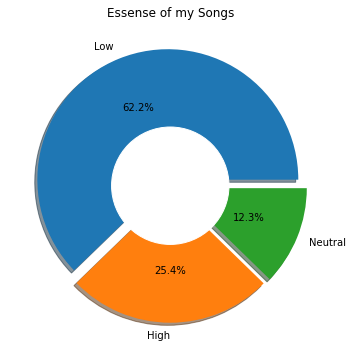

In [129]:
tempz = df_audiofeatures.essense.value_counts().to_frame().reset_index().rename(columns={'index':'essense','essense':'count'})

plt.figure(figsize=(12,6))
explode = (0.05,0.05,0.05)

# Create a pieplot
plt.pie(tempz['count'], labels=tempz['essense'], explode=explode, autopct='%1.1f%%', shadow=True)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.45, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Essense of my Songs')
plt.show()

I knew and was not surprised by the results.

So I listen to more of low spirit songs?? Which makes sense because most of the high spirit songs I listen to on youtube.